In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    # training data 
    # testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(pr.fit_transform(xtrain)), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [19]:
# path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
# df = pd.read_csv(path)
# df.to_csv('../data/module_5_auto.csv')

In [20]:
# load the dataframe
raw_dataset = pd.read_csv("../data/module_5_auto.csv")
# copy the dataset
dataset = raw_dataset.copy()
# select objetive columns
# raw_dataset = raw_dataset.loc[:, ['highway-mpg', 'price']]
dataset = dataset._get_numeric_data()
# clean nan values
dataset = dataset.dropna()
# drop unknow columns
dataset.pop('Unnamed: 0.2')
dataset.pop('Unnamed: 0.1')
dataset.pop('Unnamed: 0')
dataset

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,0,1
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,0,1
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,0,1
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,1,0


In [21]:
# training and testing
dataset_labels = dataset["price"]
dataset_features = dataset.drop("price", axis=1)

In [22]:
train_features, test_features, train_labels, test_labels = train_test_split(
    dataset_features, 
    dataset_labels, 
    test_size=0.2,
    random_state=1
)

print("number of test samples :", test_features.shape[0])
print("number of training samples:", train_features.shape[0])

number of test samples : 40
number of training samples: 157


In [23]:
lre = linear_model.LinearRegression()
lre.fit(train_features[["horsepower", 'curb-weight', 'engine-size', 'highway-mpg']], train_labels)

LinearRegression()

In [24]:
print(lre.score(test_features[["horsepower", 'curb-weight', 'engine-size', 'highway-mpg']], test_labels))

print(lre.score(train_features[["horsepower", 'curb-weight', 'engine-size', 'highway-mpg']], train_labels))

0.7475898763909614
0.8300068902506552


In [25]:
# cross validation score
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, dataset_features[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], dataset_labels, cv=4)
Rcross
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
-1 * cross_val_score(lre, dataset_features[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], dataset_labels, cv=4, scoring='neg_mean_squared_error')

The mean of the folds are 0.6399521273292352 and the standard deviation is 0.16165306391367548


array([15769739.15687495, 21161629.4363728 , 25602830.95038395,
        9804668.20576672])

In [26]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre, dataset_features[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], dataset_labels, cv=4)
yhat[0:5]

array([12730.60559593, 12730.60559593, 18182.10834343,  9476.9024478 ,
       14151.21702443])

In [76]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# find the best order for our model
rsqu_test = []
order = [1, 2, 3, 4]
for i in order:
    pr = PolynomialFeatures(degree=i)
    train_features_pr = pr.fit_transform(train_features[["horsepower", 'curb-weight', 'engine-size', 'highway-mpg']])
    test_features_pr = pr.fit_transform(test_features[["horsepower", 'curb-weight', 'engine-size', 'highway-mpg']])
    lre.fit(train_features_pr, train_labels)
    rsqu_test.append(lre.score(test_features_pr, test_labels))
rsqu_test

[0.747589876390962, 0.7723846471289858, 0.803325292277417, -14.47922581106133]

C:\Users\gonzalezj\AppData\Local\Temp\ipykernel_8360\1905818845.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\gonzalezj\AppData\Local\Temp\ipykernel_8360\1905818845.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax

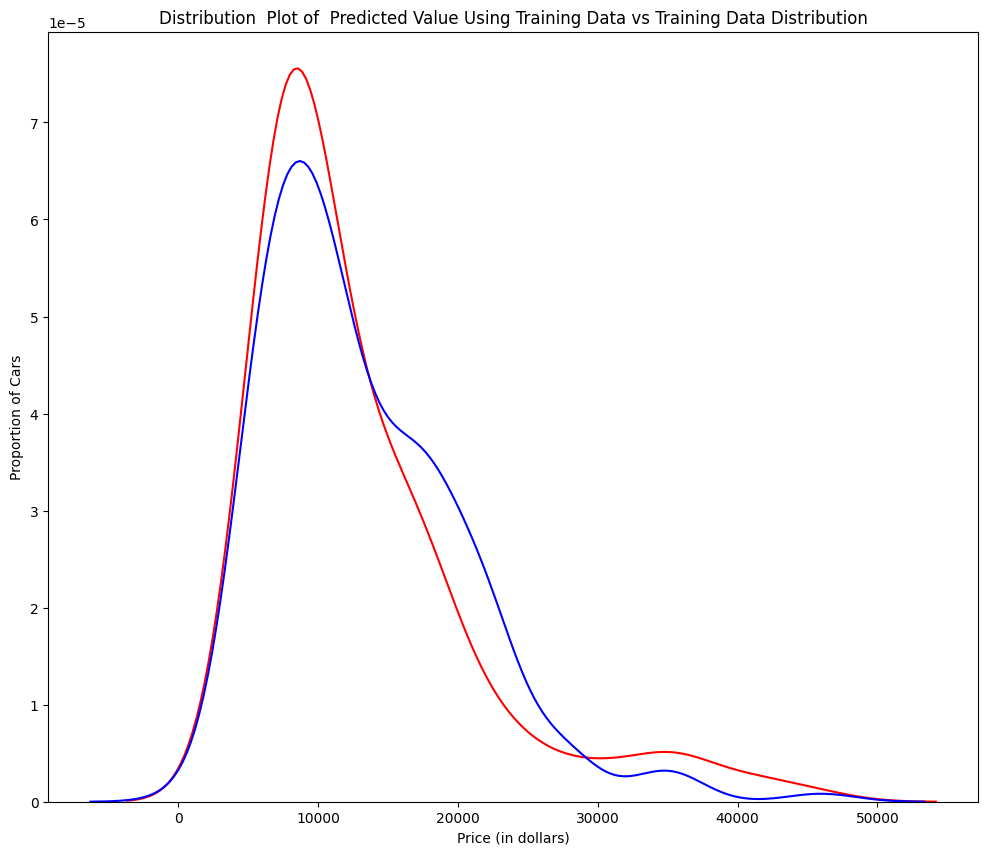

In [28]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(train_labels, yhat, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [85]:
# polynomial prediction

# find the best polynomial order
rsqu_test = []
order = [1, 2, 3, 4,5,6,7,8,9,10]
for i in order:
    pr = PolynomialFeatures(degree=i)
    train_features_pr = pr.fit_transform(train_features[["horsepower", 'engine-size']])
    test_features_pr = pr.fit_transform(test_features[["horsepower", 'engine-size']])
    lre.fit(train_features_pr, train_labels)
    rsqu_test.append(lre.score(test_features_pr, test_labels))
rsqu_test

[0.7967862364092073,
 0.8008989347565314,
 0.8405187951545311,
 0.8861292536475067,
 0.9293317427972754,
 0.92791466865631,
 0.9357164532881169,
 0.6373612919909297,
 -1.317897141807793,
 -846.0379914478304]

C:\Users\gonzalezj\AppData\Local\Temp\ipykernel_8360\1905818845.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\gonzalezj\AppData\Local\Temp\ipykernel_8360\1905818845.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax

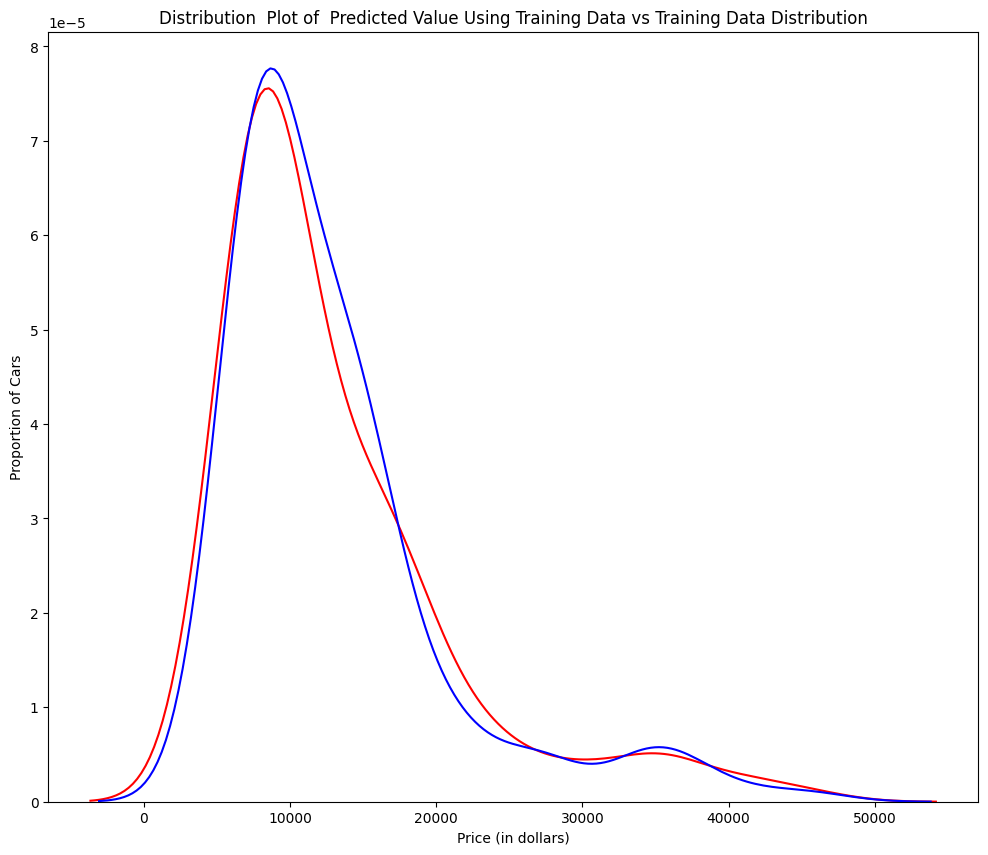

In [94]:
# polynomial prediction and plot
lre_2 = linear_model.LinearRegression()
pr = PolynomialFeatures(degree=7)

train_features_pr = pr.fit_transform(train_features[["horsepower",'engine-size']])
test_features_pr = pr.fit_transform(test_features[["horsepower",'engine-size']])
lre_2.fit(train_features_pr, train_labels)

yhat = lre_2.predict(train_features_pr)

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(train_labels, yhat, "Actual Values (Train)", "Predicted Values (Train)", Title)

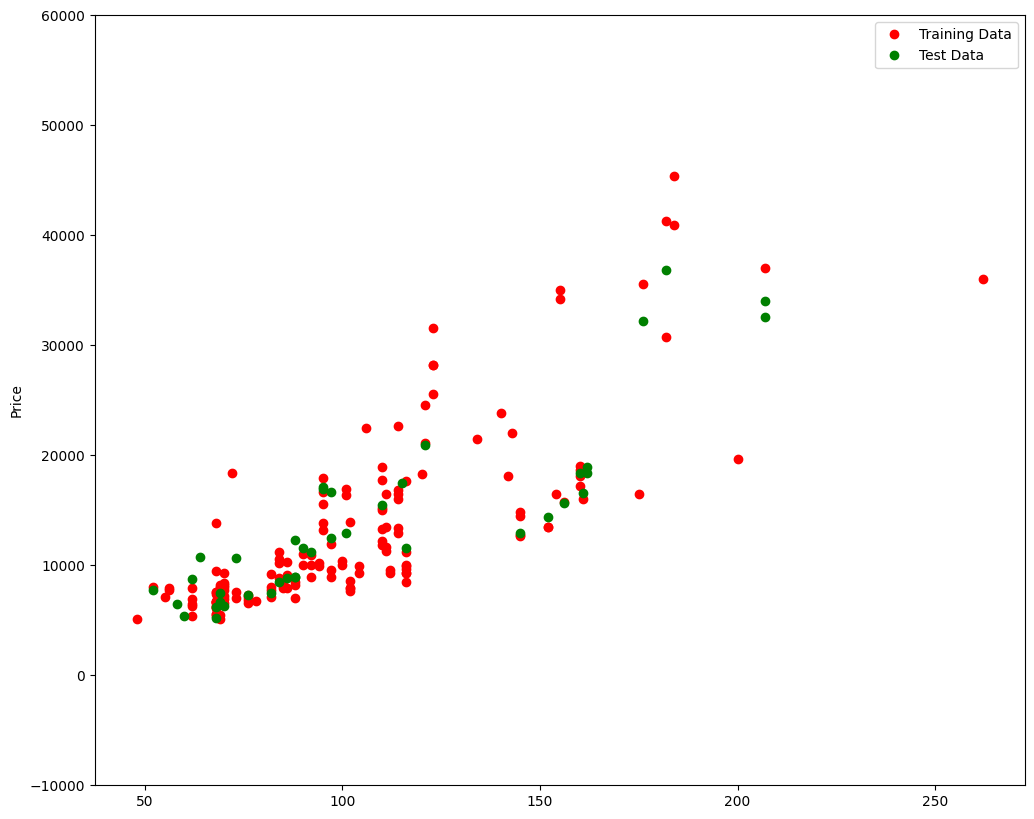

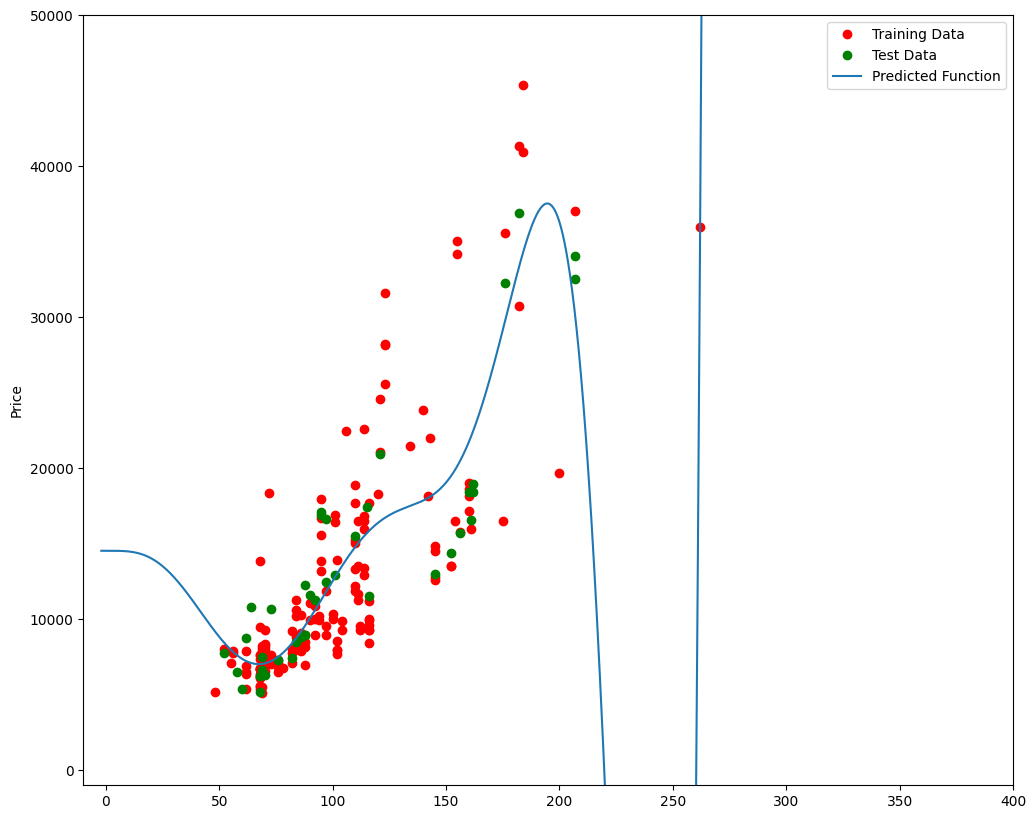

In [162]:
lre_3 = linear_model.LinearRegression()
pr = PolynomialFeatures(degree=9) 

train_features_pr = pr.fit_transform(train_features[["horsepower"]])
test_features_pr = pr.fit_transform(test_features[["horsepower"]])
lre_3.fit(train_features_pr, train_labels)
lre_3.predict(pr.fit_transform(x.reshape(-1,1)))

width = 12
height = 10
plt.figure(figsize=(width, height))
# training data 
# testing data 
# lr: linear regression object 
# poly_transform: polynomial transformation object 
xmax=max([train_features.values.max(), test_features.values.max()])
xmin=min([train_features.values.min(), test_features.values.min()])
x=np.arange(xmin, xmax, 0.1)
plt.plot(train_features["horsepower"], train_labels, 'ro', label='Training Data')
plt.plot(test_features["horsepower"], test_labels, 'go', label='Test Data')
plt.plot(x, lre_3.predict(pr.fit_transform(x.reshape(-1,1))), label='Predicted Function')
plt.ylim([-1000, 50000])
plt.xlim([-10, 400])
plt.ylabel('Price')
plt.legend()
    

In [163]:
lre_3.score(train_features_pr, train_labels)

0.6744500709264496

In [164]:
lre_3.score(test_features_pr, test_labels) 

0.8510895681511237

Text(3, 0.75, 'Maximum R^2 ')

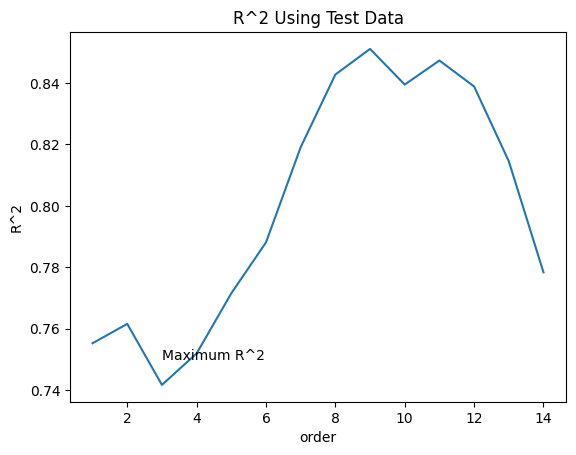

In [161]:
Rsqu_test = []

order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(train_features[['horsepower']])
    
    x_test_pr = pr.fit_transform(test_features[['horsepower']])    
    
    lre_3.fit(x_train_pr, train_labels)
    
    Rsqu_test.append(lre_3.score(x_test_pr, test_labels)) 

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')